- Rural rides repesent only 1% of total drivers, but 5.2% of total rides, indicating there may be room to recruit more drivers
- Suburban rides repesent only 13% of total rides but 31.4% of total fares, indicating a very high average fare per ride
- Urban drivers represent 86% of total drivers, yet only 62% of total fares and 67.5% of total rides, indicating there may be a surplus of urban drivers

In [4]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
ride_df = pd.read_csv("ride_data.csv")
city_df = pd.read_csv('city_data.csv')
total_data = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
total_data.head(5)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


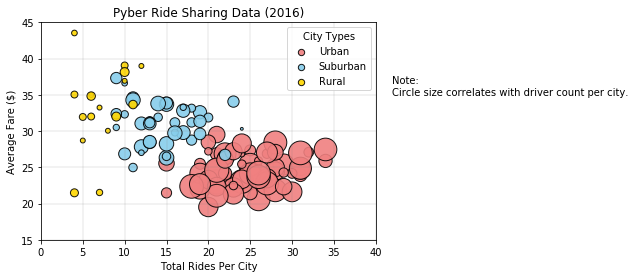

In [6]:
urban_data = total_data[total_data["type"] == "Urban"]
suburban_data = total_data[total_data["type"] == "Suburban"]
rural_data = total_data[total_data["type"] == "Rural"]

urban_fare_per_city = urban_data.groupby(['city']).mean()['fare']
urban_rides_per_city = urban_data.groupby(['city']).count()['ride_id']
urban_drivers_per_city = urban_data.groupby(['city']).mean()['driver_count']

suburban_fare_per_city = suburban_data.groupby(['city']).mean()['fare']
suburban_rides_per_city = suburban_data.groupby(['city']).count()['ride_id']
suburban_drivers_per_city = suburban_data.groupby(['city']).mean()['driver_count']

rural_fare_per_city = rural_data.groupby(['city']).mean()['fare']
rural_rides_per_city = rural_data.groupby(['city']).count()['ride_id']
rural_drivers_per_city = rural_data.groupby(['city']).mean()['driver_count']

plt.xlim(0,40)
plt.ylim(15,45)
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Rides Per City")
plt.grid(color ='grey', linestyle = '-', linewidth=0.2);

plt.scatter(urban_rides_per_city,
            urban_fare_per_city,
            s=8*urban_drivers_per_city, 
            c="lightcoral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Urban")

plt.scatter(suburban_rides_per_city,
            suburban_fare_per_city,
            s=8*suburban_drivers_per_city, 
            c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Suburban")

plt.scatter(rural_rides_per_city,rural_fare_per_city,
            s=8*rural_drivers_per_city, 
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Rural")

legend = plt.legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

plt.savefig("RideBubblePlot.png")


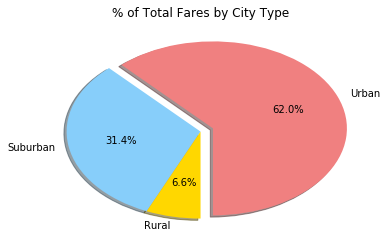

In [10]:
total_fares = total_data.sum()['fare']
urban_fare_total = urban_data.sum()['fare']
suburban_fare_total = suburban_data.sum()['fare']
rural_fare_total= rural_data.sum()['fare']

urban_fare_percent = urban_fare_total/total_fares*100
suburban_fare_percent = suburban_fare_total/total_fares*100
rural_fare_percent = rural_fare_total/total_fares*100

pie_percents = [urban_fare_percent, suburban_fare_percent, rural_fare_percent]
colors = ['lightcoral','lightskyblue', 'gold']
explode = [0.1,0.0,0.0]
plt.pie(pie_percents,
        labels = ['Urban','Suburban', 'Rural'],
        colors = colors,
        explode = explode,
        autopct='{:.1f}%'.format,
        shadow =True,
        startangle=270)
plt.title("% of Total Fares by City Type")

plt.savefig("FareByCity.png")


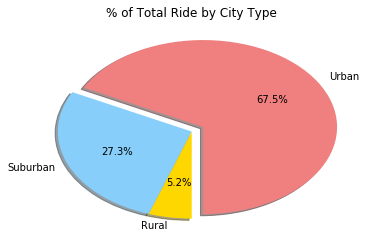

In [11]:
total_rides = total_data.count()['ride_id']
urban_ride_total = urban_data.count()['ride_id']
suburban_ride_total = suburban_data.count()['ride_id']
rural_ride_total= rural_data.count()['ride_id']

urban_ride_percent = urban_ride_total/total_rides*100
suburban_ride_percent = suburban_ride_total/total_rides*100
rural_ride_percent = rural_ride_total/total_rides*100

pie_percents = [urban_ride_percent, suburban_ride_percent, rural_ride_percent]
colors = ['lightcoral','lightskyblue', 'gold']
explode = [0.1,0.0,0.0]
plt.pie(pie_percents,
        labels = ['Urban','Suburban', 'Rural'],
        colors = colors,
        explode = explode,
        autopct='{:.1f}%'.format,
        shadow =True,
        startangle=270)
plt.title("% of Total Ride by City Type")

plt.savefig("RideByCity1.png")


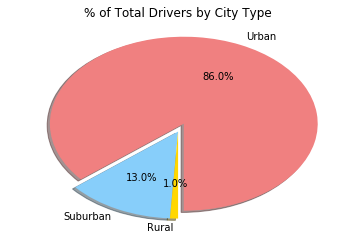

In [12]:
total_drivers = total_data.sum()['driver_count']
urban_driver_total = urban_data.sum()['driver_count']
suburban_driver_total = suburban_data.sum()['driver_count']
rural_driver_total= rural_data.sum()['driver_count']

urban_driver_percent = urban_driver_total/total_drivers*100
suburban_driver_percent = suburban_driver_total/total_drivers*100
rural_driver_percent = rural_driver_total/total_drivers*100

pie_percents = [urban_driver_percent, suburban_driver_percent, rural_driver_percent]
colors = ['lightcoral','lightskyblue', 'gold']
explode = [0.1,0.0,0.0]
plt.pie(pie_percents,
        labels = ['Urban','Suburban', 'Rural'],
        colors = colors,
        explode = explode,
        autopct='{:.1f}%'.format,
        shadow =True,
        startangle=270)
plt.title("% of Total Drivers by City Type")

plt.savefig("DriverByCity.png")
